In [2]:
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO
import pandas as pd
from pathlib import Path
from matplotlib.pyplot import cm
import seaborn as sns
from ccb.experiment import parse_results
from ccb.experiment.discriminative_metric import boostrap_pw_entropy


%load_ext autoreload
%autoreload 2

# Main Restults

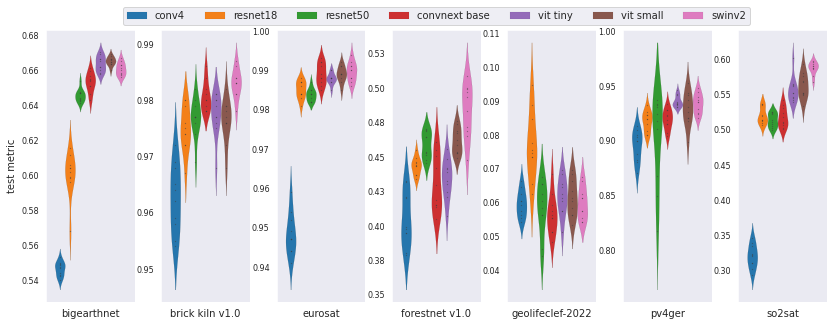

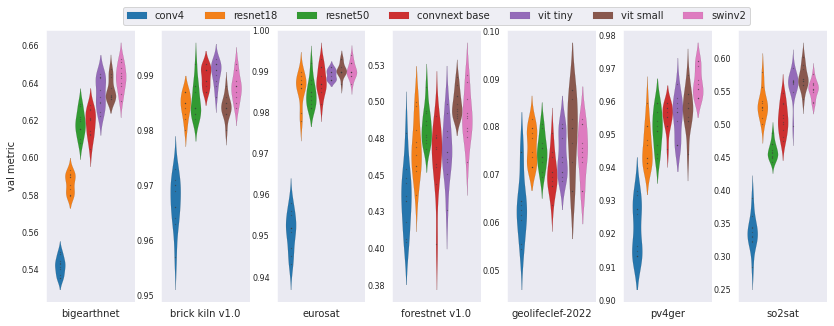

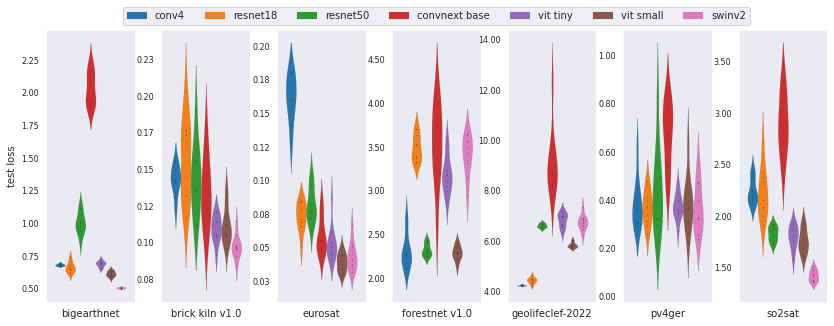

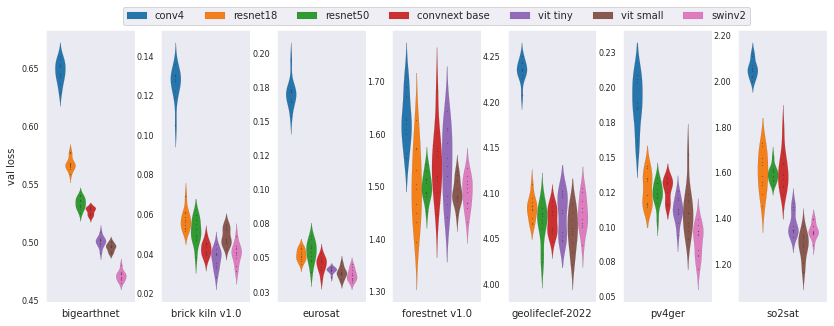

In [16]:
# sweep_results_path = "/mnt/data/experiments/nils/classification_results/sweep_results_2022-07-20_11-24-05.csv"
# df = pd.read_csv(sweep_results_path)
seeded_results_path = "/mnt/data/experiments/nils/classification_results/seeded_runs_2022-07-25_11-01-58.csv"
df = pd.read_csv(seeded_results_path)

# df['train_ratio'] = [get_train_ratio(part_name) for part_name in df['partition_name']]
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

model_order = "conv4,resnet18,resnet50,convnext base,vit tiny,vit small,swinv2".split(",")
ds_1x = df[df['partition name'] == '1.00x train'].copy()
normalizer = parse_results.make_normalizer(ds_1x)
normalizer.normalize_data_frame(ds_1x, ["test metric", "val metric"])


parse_results.plot_per_dataset_3(ds_1x, model_order, metric="test metric", sharey=False, inner="points")
plt.savefig(Path.home() / "figures" / "test metric.pdf", bbox_inches="tight")
parse_results.plot_per_dataset_3(ds_1x, model_order, metric="val metric", sharey=False, inner="points")
parse_results.plot_per_dataset_3(ds_1x, model_order, metric="test loss", sharey=False, inner="points")
parse_results.plot_per_dataset_3(ds_1x, model_order, metric="val loss", sharey=False, inner="points")


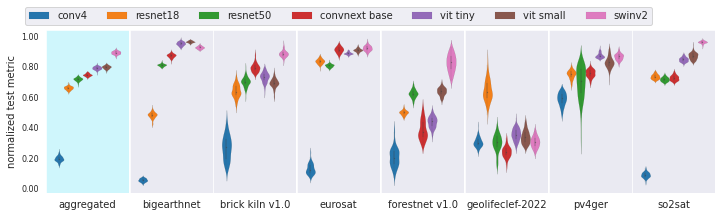

In [14]:
parse_results.plot_bootstrap_aggregate(ds_1x, metric="normalized test metric", model_order=model_order, fig_size=(12,3))
# parse_results.plot_bootstrap_aggregate(ds_1x, metric="normalized val_metric", model_order=model_order)
plt.savefig(Path.home() / "figures" / "normalized test metric.pdf", bbox_inches="tight")

# Train Size Analysis

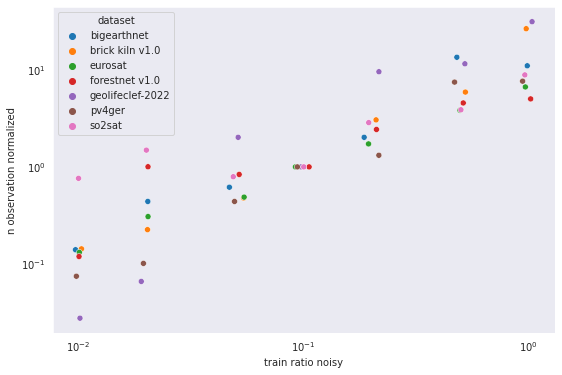

In [ ]:
seeded_results_path = "/mnt/data/experiments/nils/classification_results/seeded_runs_2022-07-25_11-01-58.csv"
df = pd.read_csv(seeded_results_path)
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

plt.rcParams['figure.figsize'] = [9, 6]

# parse_results.plot_normalized_time(df, average_seeds=False)
parse_results.plot_normalized_time(df, average_seeds=True)


so2sat
brick kiln v1.0
eurosat
pv4ger
forestnet v1.0
bigearthnet
geolifeclef-2022


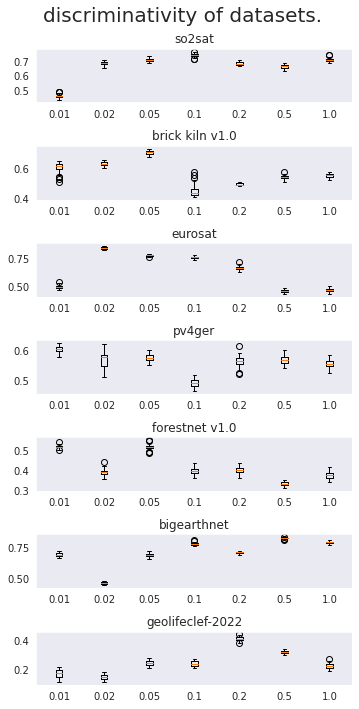

In [ ]:
# old code, just keep it here for now.

plt.rcParams['figure.figsize'] = [5, 10]


def plot_discriminative_metric(df, metric="test metric", n_largest=3):
    models = df["model"].unique()
    datasets = df['dataset'].unique()
    train_ratios = np.sort(df['train ratio'].unique())

    fig, axes = plt.subplots( len(datasets), 1)
    fig.suptitle("discriminativity of datasets.", fontsize=20)
    

    for i, dataset in enumerate(datasets):

        print(dataset)
        discr_val = []
        for k, train_ratio in enumerate(train_ratios):

            # print(f"  train ratio : {train_ratio}")

            all_scores = []
            for j, model in enumerate(models):
                sub_df = df[(df["dataset"] == dataset) & (df['train ratio'] == train_ratio) & (df['model'] == model)]
                sub_df = sub_df.nlargest(n_largest, columns="val metric")
                scores = sub_df[metric].to_numpy()
                if len(scores) == 0:
                    print(f"  train ration: {train_ratio}: missing {model}")
                # print(f"    {j}: {scores}")
                all_scores.append(scores)
            
            # pw_entr = pairwise_entropy(all_scores)
            
            pw_entr_list = boostrap_pw_entropy(all_scores, repeat=50, std_ratio=0.2, replace=False)
            # print(f"    pw entr: {pw_entr}")
            axes[i].boxplot(1 - np.array(pw_entr_list), positions=[k])

            # discr_val.append(1 - pw_entr)
        
        axes[i].set_title(f"{dataset}")
        # axes[i].set_ylim((0.5,1))
        # axes[i].plot(np.arange(len(discr_val)), discr_val, marker='.')
        axes[i].set_xticklabels([str(trn_ratio) for trn_ratio in train_ratios])
    fig.tight_layout()

plot_discriminative_metric(df, metric="val metric", n_largest=100)

In [6]:
%pwd

'/mnt/home/dev/climate-change-benchmark/ccb/experiment'

In [12]:
Path.home() / "asdf"

PosixPath('/mnt/home/asdf')